Load the forest fire data and answer the questions 

<html>
<body>
<h1 style="background-color: #022851;"><center>
    <br><font size="+3.5">
    <font color=#FFBF00><b>Introduction to Machine Learning</b></font>
   </font>
    <br><font size="+1">
    <font color=#FFBF00><b>WEEK 2 | PROBLEM SET 2 (Pandas, NumPy, Matplotlib) </b></font>
   </font>
    <br><font size="+1">
    <font color=#FFBF00><b>Name:</b> Blue Ferdinand Alday </font> <br>
    <font color=#FFBF00><b>Due Date:</b> 9/22/2024 </font>
   </font> 
    </center>
</h1>
</body>
</html>


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"

In [37]:
df = pd.read_csv(url)

In [38]:
" display the basic information about the data"
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [39]:
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


#### Description of the features
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

In [40]:
"""How many observations are there in the dataset?"""

# count the number of rows in the dataset to get the observation total using the first shape value
print(f"Number of Observations: {df.shape[0]}")

Number of Observations: 517


In [41]:
"""Select the columns month, day, area"""

df_month_day_area = df[["month", "day", "area"]]

"""Display the selection"""
df_month_day_area

,month,day,area
0,mar,fri,0.00
1,oct,tue,0.00
2,oct,sat,0.00
3,mar,fri,0.00
4,mar,sun,0.00
...,...,...,...
512,aug,sun,6.44
513,aug,sun,54.29
514,aug,sun,11.16
515,aug,sat,0.00


In [42]:
"""How many observations are there with a fire (i.e., area>0)"""

df_fire = len(df[df["area"] > 0])
print(f"Number of Observations with a fire: {df_fire}")

Number of Observations with a fire: 270


In [43]:
"""Show the columns month, day, area of the observations with a fire."""

df_fire_subset = df_month_day_area[df_month_day_area["area"] > 0]

"""Display dataframe with the expected columns"""
df_fire_subset

,month,day,area
138,jul,tue,0.36
139,sep,tue,0.43
140,sep,mon,0.47
141,aug,wed,0.55
142,aug,fri,0.61
...,...,...,...
509,aug,fri,2.17
510,aug,fri,0.43
512,aug,sun,6.44
513,aug,sun,54.29


In [44]:
"""How many observations are there with a rain (i.e., rain>0)"""

df_rain = len(df[df["rain"] > 0])
print(f"Number of Observations with rain: {df_rain}")

Number of Observations with rain: 8


In [45]:
"""How many observations are there with both a fire and a rain?"""

df_fire_and_rain = len(df[(df["area"] > 0) & (df["rain"] > 0)])
print(f"Number of Observations with both a fire and rain: {df_fire_and_rain}")

Number of Observations with both a fire and rain: 2


In [46]:
"""How large are the five largest fires (i.e., having largest area) """

"""Sort by area with the highest first and write the 5 largest into a dataframe"""

sorted_by_area = df.sort_values(by="area", ascending=False)

five_largest_fires = sorted_by_area["area"].head(5)
five_largest_fires = five_largest_fires.to_frame()

five_largest_fires

,area
238,1090.84
415,746.28
479,278.53
237,212.88
236,200.94


In [47]:
"""What are the corresponding month, temp, RH, wind, rain area?"""

"""Create a subset dataframe with the requested columns"""

sorted_by_area_subset = sorted_by_area[["month", "temp", "RH", "wind", "area"]]
sorted_by_area_subset.head(5)

,month,temp,RH,wind,area
238,sep,25.1,27,4.0,1090.84
415,aug,27.5,27,4.9,746.28
479,jul,22.6,57,4.9,278.53
237,sep,18.8,40,2.2,212.88
236,sep,18.2,46,1.8,200.94


In [48]:
"""Add new column to the data indicating whether a fire occurred for each observation (True for area >0 and False for area ==0) """

"""add a new column in the dataframe based on whether there is a fire or not"""
df["Did Fire Occur?"] = df["area"] > 0

df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Did Fire Occur?
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,False
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,False
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,False
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,False
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,True
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,True
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,True
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,False


In [49]:
"""Which month had highest rain fall"""

"""use groupby with month and add up rain values"""
df_month_rain = df.groupby("month")["rain"].sum()

"""retrieve the month with the highest rainfall"""
month_with_highest_rain = df_month_rain.idxmax()

print(
    f"The month with the highest rainfall was {month_with_highest_rain.capitalize()}."
)

The month with the highest rainfall was Aug.


In [50]:
"Is there any relation between wind speed and rain"
df_rain_wind = df[["wind", "rain"]]

"Use the corr() function to see if there is a correlation between the 2 columns"
print(df_rain_wind.corr())

corr = df_rain_wind.corr()
corr.style.background_gradient(cmap="coolwarm")

          wind      rain
wind  1.000000  0.061119
rain  0.061119  1.000000


,wind,rain
wind,1.000000,0.061119
rain,0.061119,1.000000


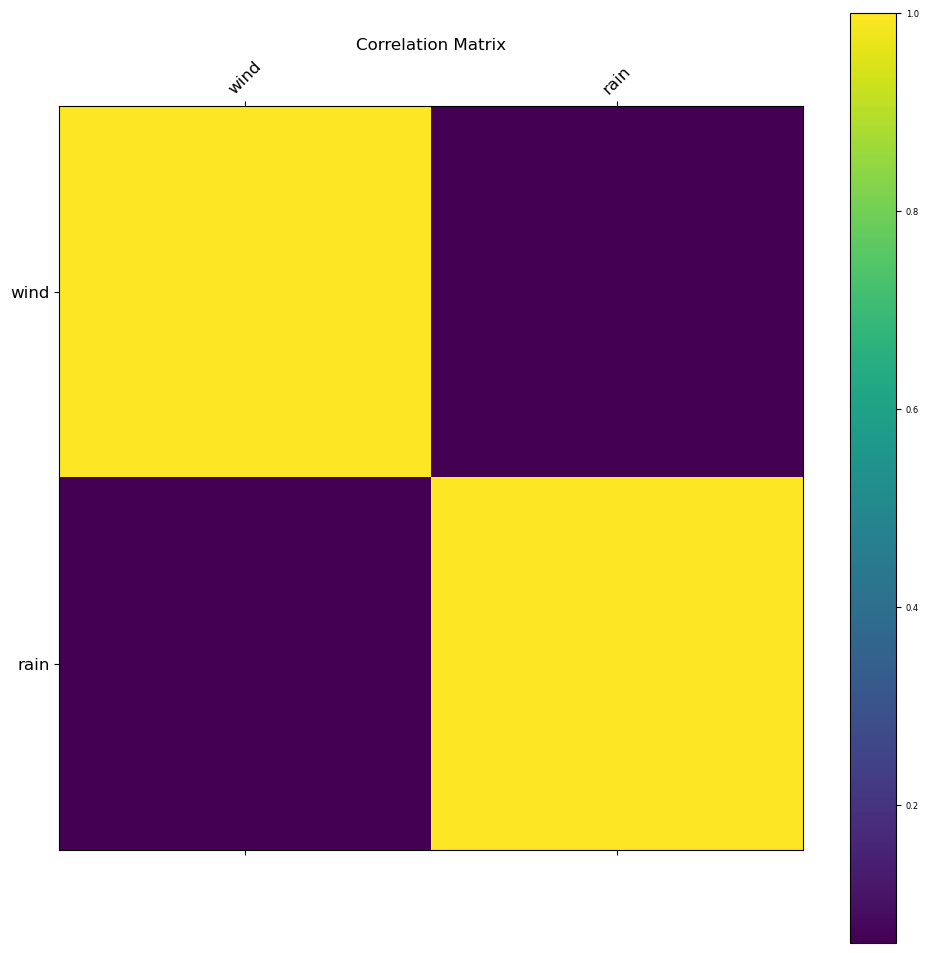

In [51]:
# use matplotlib to create a correlation matrix
# this graph was copied from https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
# with data from dataframe df_rain_wind

f = plt.figure(figsize=(12, 12))
plt.matshow(df_rain_wind.corr(), fignum=f.number)
plt.xticks(
    range(df_rain_wind.select_dtypes(["number"]).shape[1]),
    df_rain_wind.select_dtypes(["number"]).columns,
    fontsize=12,
    rotation=45,
)
plt.yticks(
    range(df_rain_wind.select_dtypes(["number"]).shape[1]),
    df_rain_wind.select_dtypes(["number"]).columns,
    fontsize=12,
)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=6)
plt.title("Correlation Matrix", fontsize=12);